# WHO Life Expectancy Exploratory Data Analysis and Predictive Modeling

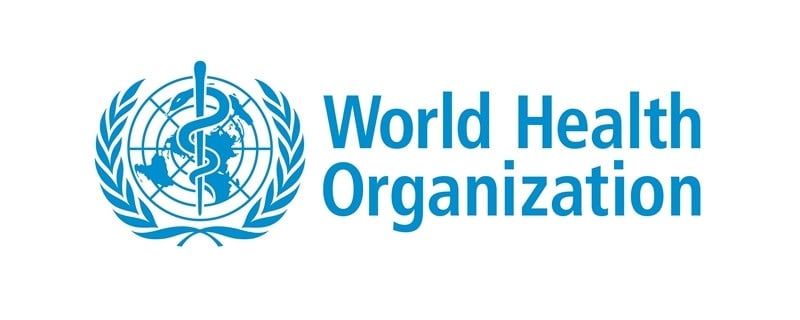

In [1632]:
# Import necessary libraries
import pandas as pd
import difflib
pd.set_option('display.max_columns', None)
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn.model_selection import cross_val_score
from scipy.stats import boxcox
from fuzzywuzzy import fuzz, process

# Import WHO Life Expectancy Dataset
df = pd.read_csv('Life Expectancy Data.csv')

## Exploratory Data Analysis

### Data Cleaning, Wrangling, and Merging

In [1633]:
# Display first 5 rows of data
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [1634]:
# Display information about columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [1635]:
# Find statistical measures for each column
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


It's important to consider that this dataset is from 2000 - 2015, indicated by the min and max values of the Year column.

In [1636]:
# Display missing value count per column
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

This indicates that missing values vary on a column-by-column basis, with population, GDP, and Hepatitis B having notably high missing value counts. Let's try to merge this dataset some updated population data from the World Bank (data.worldbank.org) for better results. 

In [1637]:
# Display population dataset
populations = pd.read_csv('population_data.csv')
populations.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,59330.0,59106.0,58816.0,58855.0,59365.0,60028.0,60715.0,61193.0,61465.0,61738.0,62006.0,62267.0,62614.0,63116.0,63683.0,64174.0,64478.0,64553.0,64450.0,64332.0,64596.0,65712.0,67864.0,70192.0,72360.0,74710.0,77050.0,79417.0,81858.0,84355.0,86867.0,89101.0,90691.0,91781.0,92701.0,93540.0,94483.0,95606.0,96787.0,97996.0,99212.0,100341.0,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,167596160.0,172475766.0,177503186.0,182599092.0,187901657.0,193512956.0,199284304.0,205202669.0,211120911.0,217481420.0,224315978.0,230967858.0,237937461.0,245386717.0,252779730.0,260209149.0,267938123.0,276035920.0,284490394.0,292795186.0,301124880.0,309890664.0,318544083.0,326933522.0,335625136.0,344418362.0,353466601.0,362985802.0,372352230.0,381715600.0,391486231.0,401600588.0,412001885.0,422741118.0,433807484.0,445281555.0,457153837.0,469508516.0,482406426.0,495748900.0,509410477.0,523459657.0,537792950.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,10494489.0,10752971.0,11015857.0,11286753.0,11575305.0,11869879.0,12157386.0,12425267.0,12687301.0,12938862.0,12986369.0,12486631.0,11155195.0,10088289.0,9951449.0,10243686.0,10512221.0,10448442.0,10322758.0,10383460.0,10673168.0,10694796.0,10745167.0,12057433.0,14003760.0,15455555.0,16418912.0,17106595.0,17788819.0,18493132.0,19262847.0,19542982.0,19688632.0,21000256.0,22645130.0,23553551.0,24411191.0,25442944.0,25903301.0,26427199.0,27385307.0,28189672.0,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,118615741.0,121424797.0,124336039.0,127364044.0,130563107.0,133953892.0,137548613.0,141258400.0,145122851.0,149206663.0,153459665.0,157825609.0,162323313.0,167023385.0,171566640.0,176054495.0,180817312.0,185720244.0,190759952.0,195969722.0,201392200.0,206739024.0,212172888.0,217966101.0,223788766.0,229675775.0,235861484.0,242200260.0,248713095.0,255482918.0,262397030.0,269611898.0,277160097.0,284952322.0,292977949.0,301265247.0,309824829.0,318601484.0,327612838.0,336893835.0,346475221.0,356337762.0,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,5928386.0,6029700.0,6177049.0,6364731.0,6578230.0,6802494.0,7032713.0,7266780.0,7511895.0,7771590.0,8043218.0,8330047.0,8631457.0,8947152.0,9276707.0,9617702.0,9970621.0,10332574.0,10694057.0,11060261.0,11439498.0,11828638.0,12228691.0,12632507.0,13038270.0,13462031.0,13912253.0,14383350.0,14871146.0,15366864.0,15870753.0,16394062.0,16941587.0,17516139.0,18124342.0,18771125.0,19450959.0,20162340.0,20909684.0,21691522.0,22507674.0,23364185.0,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,312735

In [1638]:
# Checking if data types are the same for year values in df and populations
populations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

Since there is an 'Indicator Name' column with the value 'Population, total', we need to ensure that that is the only possible value, as we want only total population data per country.

In [1639]:
# Display all distinct values for the Indicator Name column
populations['Indicator Name'].unique()

array(['Population, total'], dtype=object)

Now we know that the total population is the only value for that column, and we can proceed by merging the data. First, we need to 'melt' or 'unpivot' the populations data to ensure the granularity matches that of the original life expectancy dataset.

In [1640]:
# Getting all columns that represent years
year_columns = populations.columns[4:-1]

# Reshaping the populations data by 'unpivoting' or 'melting' the data from a wide to long format
populations_new = pd.melt(populations,
                           id_vars=['Country Name'], 
                           value_vars=year_columns, 
                           var_name='Year', 
                           value_name='Population')

populations_new.head(5)

,Country Name,Year,Population
0,Aruba,1960,54608.0
1,Africa Eastern and Southern,1960,130692579.0
2,Afghanistan,1960,8622466.0
3,Africa Western and Central,1960,97256290.0
4,Angola,1960,5357195.0


Now that the populations data has the desired granularity, we can merge the datasets. Before we merge however, we need to ensure that the country names in df are all present in populations_new:

In [1641]:
# Check for countries in df that aren't in populations_new
mismatched_countries = set(df['Country'].unique()) - set(populations_new['Country Name'].unique())
print(mismatched_countries)

{'Micronesia (Federated States of)', "Lao People's Democratic Republic", 'Democratic Republic of the Congo', 'United Kingdom of Great Britain and Northern Ireland', 'Congo', 'Slovakia', 'The former Yugoslav republic of Macedonia', 'Cook Islands', 'Republic of Moldova', 'Yemen', 'Niue', 'Saint Vincent and the Grenadines', 'Venezuela (Bolivarian Republic of)', 'Bahamas', "Côte d'Ivoire", 'Swaziland', "Democratic People's Republic of Korea", 'United Republic of Tanzania', 'Iran (Islamic Republic of)', 'Turkey', 'Bolivia (Plurinational State of)', 'Gambia', 'Saint Kitts and Nevis', 'Kyrgyzstan', 'Saint Lucia', 'Egypt', 'Republic of Korea', 'United States of America'}


Since there are so many countries that most likely have different aliases in the populations dataset, we can use the difflin library to find the best match for each country name and merge that way.

In [1642]:
# Convert the 'Year' column in populations_new to integer
populations_new['Year'] = populations_new['Year'].astype(int)

# Create a dictionary to store the matched names
country_name_mapping = {}

for country in df['Country']:
    best_match = difflib.get_close_matches(country, populations['Country Name'], n=1, cutoff=0.85)
    
    if best_match:
        country_name_mapping[country] = best_match[0]

# Apply the mapping to the 'Country' column in df
df['Country'].replace(country_name_mapping, inplace=True)

# Merge data
data = pd.merge(left=df, right=populations_new, left_on=['Year', 'Country'], right_on=['Year', 'Country Name'], how='left')

# Use population_y  unless it is null


# Create a new 'Population' column by filling missing values in 'Population_y' with values from 'Population_x'
data['Population'] = data['Population_y'].combine_first(data['Population_x'])
data.drop(['Population_x', 'Population_y', 'Country Name'], axis=1, inplace=True)
data.columns = data.columns.str.strip()

data.head(3)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Population
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,33753499.0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,32716210.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,31541209.0


Now let's check the updated missing value counts for the Population column:

In [1643]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
Population                         338
dtype: int64

### Multivariate Analysis

<AxesSubplot:xlabel='Year', ylabel='Life expectancy'>

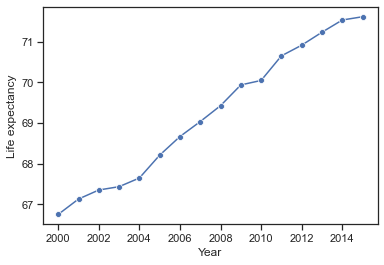

In [1644]:
# Group data by year and calculate the average life expectancy for each year
average_life_expectancy_by_year = data.groupby('Year')['Life expectancy'].mean().reset_index()
average_life_expectancy_by_year

# Create line plot
sns.lineplot(data=average_life_expectancy_by_year, x=average_life_expectancy_by_year['Year'], y=average_life_expectancy_by_year['Life expectancy'], marker = 'o', linestyle = '-')

Overall, there seems to be a positive linear relationship between the year and the average life expectancy across all countries. To examine other correlations between variables, let's make a correlation heatmap:

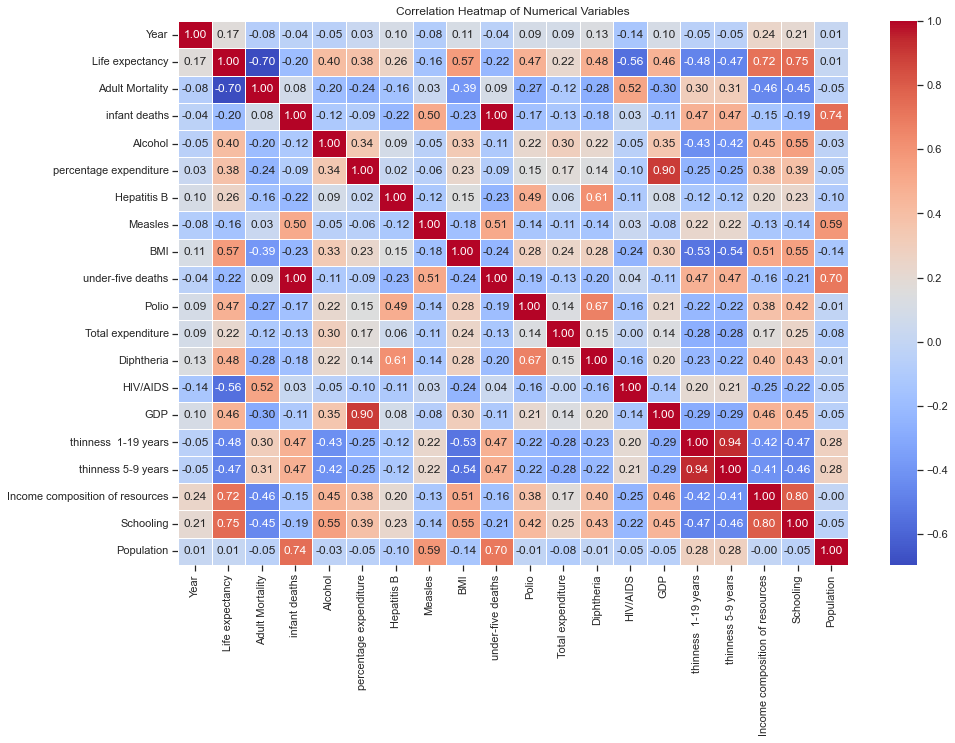

In [1645]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

From this heatmap, we can see that some variables have high correlations with each other, such as GDP and percentage expenditure (apart from with life expectancy, as that is what we will try to predict in modeling). This results in multicollinearity, which could be a big problem when modeling. To deal with this, let's calculate the variance inflaction factors (VIF) for each variable, and determine if there is high multicollinearity as the first step in our feature engineering process.

### Feature Engineering 

We can start by splitting our data into training, validation, and testing sets and imputing missing values and values set to 0 (we will assume those are missing, as it makes sense in the contexts of features with a lot of odd 0s). Additionally, we can cut the 'Country' from our training and testing sets. We will apply the imputation model for testing on val and test sets, and use information learned from x_train to impute missing values in x_val and x_test without leaking information between these datasets.

In [1646]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(data.drop(columns=["Life expectancy"]), 
                                                     data["Life expectancy"], 
                                                     test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply KNN imputation to the numeric columns in the training data
imputer = KNNImputer(n_neighbors=4)

numeric_cols_train = X_train.select_dtypes(include=[np.number])
numeric_cols_train.replace(0, np.nan, inplace=True)
X_train_numeric_imputed = pd.DataFrame(imputer.fit_transform(numeric_cols_train), 
                                       columns=numeric_cols_train.columns, 
                                       index=numeric_cols_train.index)

# Impute validation and test sets with the same imputer
numeric_cols_val = X_val.select_dtypes(include=[np.number]).replace(0, np.nan)
numeric_cols_test = X_test.select_dtypes(include=[np.number]).replace(0, np.nan)
X_val_numeric_imputed = pd.DataFrame(imputer.transform(numeric_cols_val), 
                                     columns=numeric_cols_val.columns, 
                                     index=numeric_cols_val.index)
X_test_numeric_imputed = pd.DataFrame(imputer.transform(numeric_cols_test), 
                                      columns=numeric_cols_test.columns, 
                                      index=numeric_cols_test.index)

# Reconstruct full datasets with imputed numeric and original non-numeric columns
X_train = pd.concat([X_train_numeric_imputed, X_train.select_dtypes(exclude=[np.number])], axis=1)
X_val = pd.concat([X_val_numeric_imputed, X_val.select_dtypes(exclude=[np.number])], axis=1)
X_test = pd.concat([X_test_numeric_imputed, X_test.select_dtypes(exclude=[np.number])], axis=1)

# Check for missing values in the datasets
print("Missing values in training set:", X_train.isnull().sum().sum())
print("Missing values in validation set:", X_val.isnull().sum().sum())
print("Missing values in test set:", X_test.isnull().sum().sum())

# Count zero values in the training set
zero_values_train = (X_train == 0).sum().sum()
print("Zero values in training set:", zero_values_train)

# Count zero values in the validation set
zero_values_val = (X_val == 0).sum().sum()
print("Zero values in validation set:", zero_values_val)

# Count zero values in the test set
zero_values_test = (X_test == 0).sum().sum()
print("Zero values in test set:", zero_values_test)




Missing values in training set: 0
Missing values in validation set: 0
Missing values in test set: 0
Zero values in training set: 0
Zero values in validation set: 0
Zero values in test set: 0


Now that values are imputed using KNN, we can move onto tackling multicollinearity.

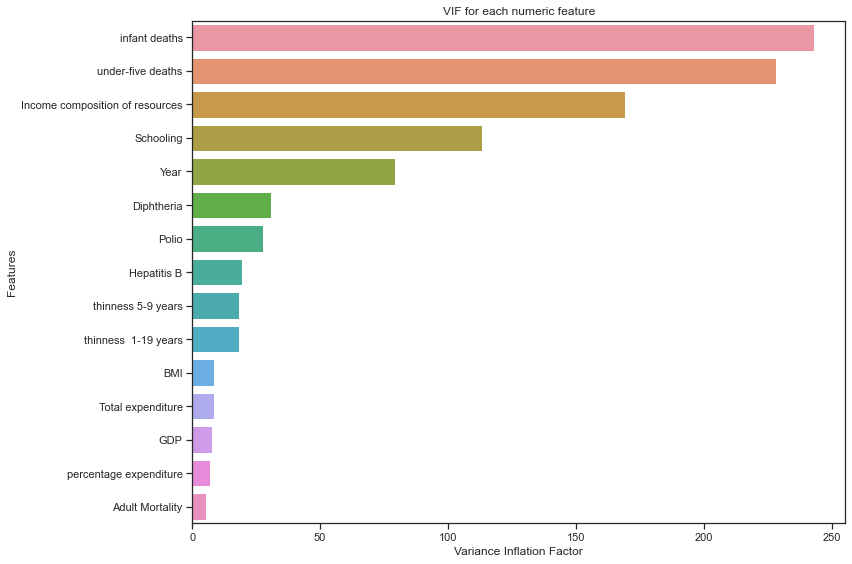

In [1647]:
# Calculate VIF only for numeric columns
numeric_cols_train = X_train.select_dtypes(include=[np.number])

# Calculate VIF for each numeric feature
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_cols_train.columns

# Calculate VIF for each numeric feature
vif_data["VIF"] = [variance_inflation_factor(numeric_cols_train.values, i) for i in range(numeric_cols_train.shape[1])]

# Drop the entry for the constant as it's not a feature and only select VIF > 5
vif_data = vif_data[vif_data['feature'] != 'const']
vif_data = vif_data.loc[vif_data["VIF"] > 5]

# Plot the VIFs for numeric features
plt.figure(figsize=(12, 8))
sns.barplot(x="VIF", y="feature", data=vif_data.sort_values(by="VIF", ascending=False))
plt.title('VIF for each numeric feature')
plt.xlabel('Variance Inflation Factor')
plt.ylabel('Features')

plt.tight_layout()
plt.show()


We can determine what features to cut from the training set by plotting the relationships of VIF > 5 columns and our target variable life expectancy. We can drop the columns that are similar to others and have lower correlation with our target variable while having VIF > 10.

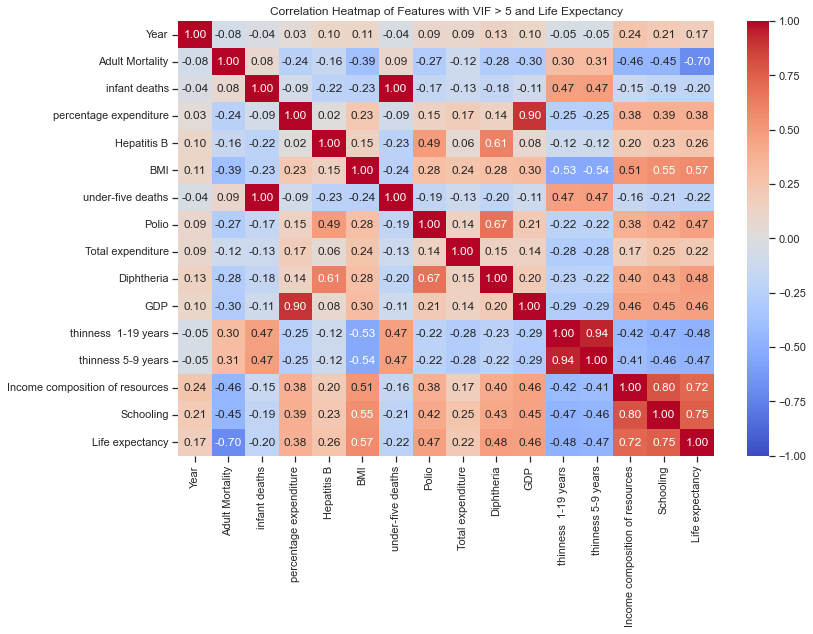

In [1648]:
# Select the features with VIF over 5
high_vif_features = vif_data[vif_data["VIF"] > 5]['feature']

# Include 'Life expectancy' in the selected features
selected_features = high_vif_features.tolist()
selected_features.append('Life expectancy')

# Create a DataFrame with selected features
selected_data = data[selected_features]

# Calculate the correlation matrix
corr_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features with VIF > 5 and Life Expectancy')
plt.show()


It is apparent that Income composition of resources and Schooling are highly correlated, which could lead to multicollinearity. Since schooling is most likely a result of the income composition of resources, we can eliminate the latter as schooling represents a similar but slightly higher effect on life expectancy overall. Additionally, we can drop infant deaths as it is highly correlated with under-5 deaths but has a lower correlation with the target variable.

We can also cut the 'thinness 5-9 years' as it is encapsulated by 'thinness 1-19 years', they are highly correlated, and the latter has a higher correlation with the target variable.

Percentage expenditure and GDP measure similar aspects but are highly correlated. GDP has a higher correlation with life expectancy, making it a more relevant variable. Therefore, dropping percentage expenditure is reasonable.

In [1649]:
# Drop the high VIF and low correlation with target variable columns from X_train and X_tes
X_train = X_train.drop(columns=['thinness 5-9 years', 'percentage expenditure', 'infant deaths'])
X_val = X_val.drop(columns=['thinness 5-9 years', 'infant deaths', 'percentage expenditure'])
X_test = X_test.drop(columns=['thinness 5-9 years', 'infant deaths', 'percentage expenditure'])

We can also plot the updated VIFs to determine if dropping these columns made an impact.

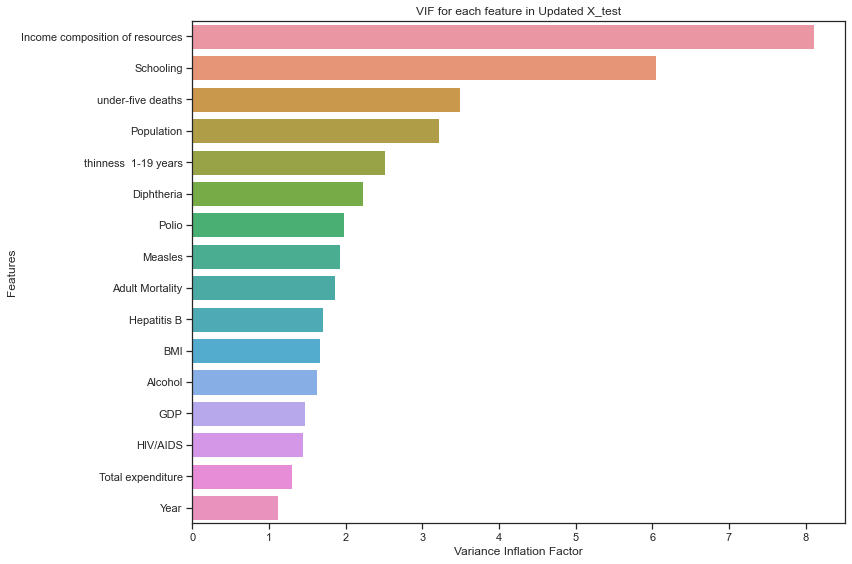

In [1650]:
# Calculate VIF for the updated X_test
numeric_cols_test = X_test.select_dtypes(include=[np.number])
X_test_numeric = sm.add_constant(numeric_cols_test)
vif_test = pd.DataFrame()
vif_test["feature"] = X_test_numeric.columns
vif_test["VIF"] = [variance_inflation_factor(X_test_numeric.values, i) for i in range(X_test_numeric.shape[1])]
vif_test = vif_test[vif_test["VIF"] > 0]
vif_test = vif_test.loc[vif_test['feature'] != 'const']

# Plot the updated VIFs
plt.figure(figsize=(12, 8))
sns.barplot(x="VIF", y="feature", data=vif_test.sort_values(by="VIF", ascending=False))
plt.title('VIF for each feature in Updated X_test')
plt.xlabel('Variance Inflation Factor')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

Now, there are no features with a VIF above 10, which was our threshold for negatively impactful multicollinearity. Now that we have addressed collinearity, we can move onto feature transformation.

First, we have to consider the categorical variable 'Status', which has either 'Developed' or 'Developing' as its values. To make this part of the model, we can one-hot encode the feature.

In [1651]:
# One-hot encode the 'status' column for each dataset
X_train_encoded = pd.get_dummies(X_train, columns=['Status'], drop_first=True)
X_val_encoded = pd.get_dummies(X_val, columns=['Status'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['Status'], drop_first=True)

X_train = X_train_encoded
X_val = X_val_encoded
X_test = X_test_encoded

Now that we have one hot encoded the status categorical feature, we can move onto transforming the numerical features to linearize them for the multiple regression model. To determine what features to apply log or polynomial transformations on, we can plot each potential predictor variable against our target variable.

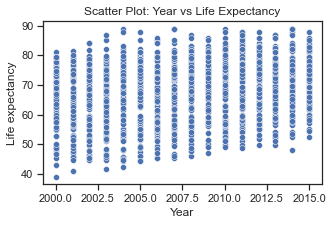

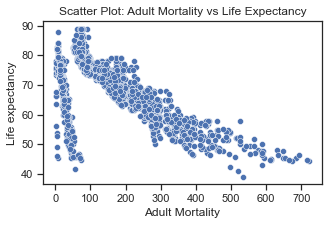

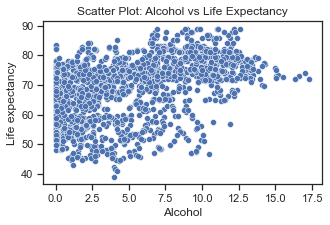

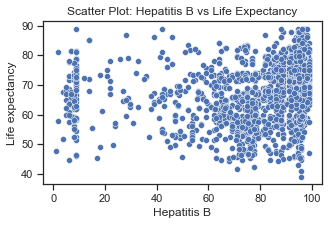

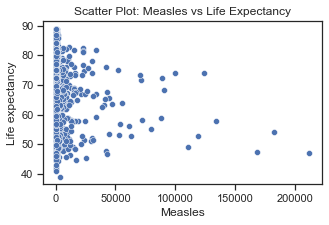

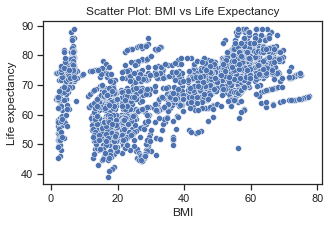

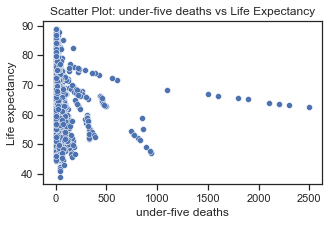

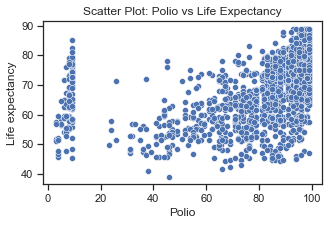

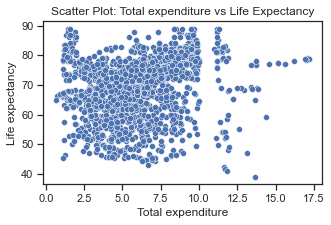

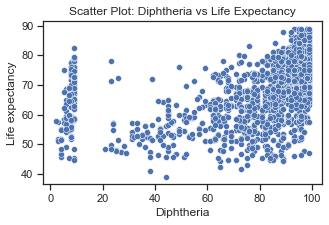

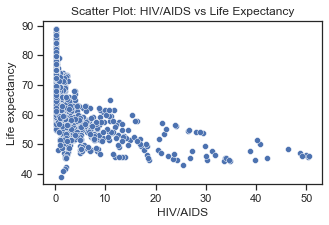

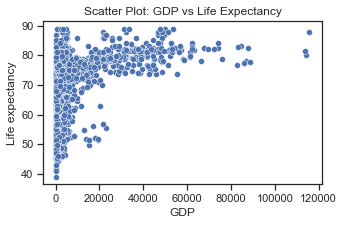

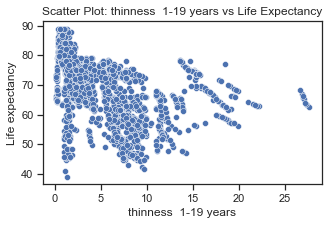

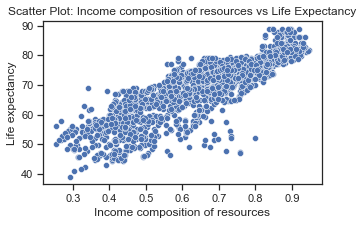

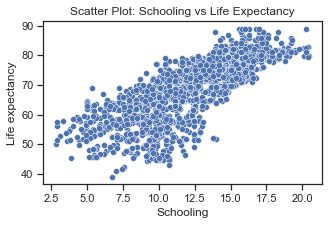

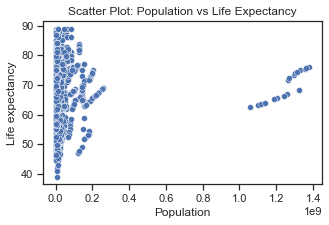

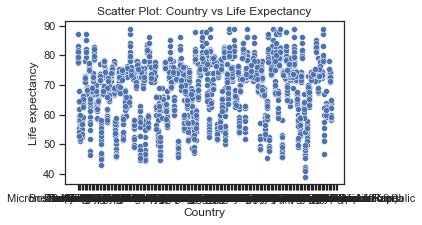

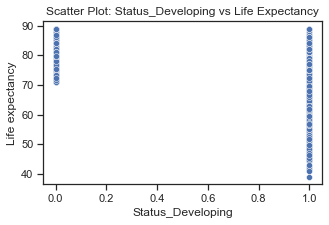

In [1652]:
# Visual inspection of non-linear relationships
for column in X_train.columns:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=X_train[column], y=y_train)
    plt.title(f'Scatter Plot: {column} vs Life Expectancy')
    plt.show()

Due to no visual correlation with the target variable, we can drop the columns total expenditure, country (name), measles. Then, based on the Tukey-Mostellar Bulge diagram, we can define a function that applies the necessary transformation to any features with non-linear relationships with life expectancy in training, validation, and test sets.

In [1653]:
# Define column dropper function
def dropper(sets, cols):
    return [df.drop(columns=cols) for df in sets]

[X_train, X_val, X_test] = dropper([X_train, X_val, X_test], ['Total expenditure', 'Country', 'Measles'])
        

Although population may seem useless for modeling purposes visually, we can see that there are two clustered lines of outliers. From drawing in outside knowledge, these two outlier segments are the two most populated countries by a wide margin, India and China. To linearize the population variable with the outcome feature life expectancy, we can perform Box-Cox transformation on the feature using the function from scipy, estimating the best-fit lambda paramter that maximizes linearity.

Best-fit lambda: 0.05760500856556614


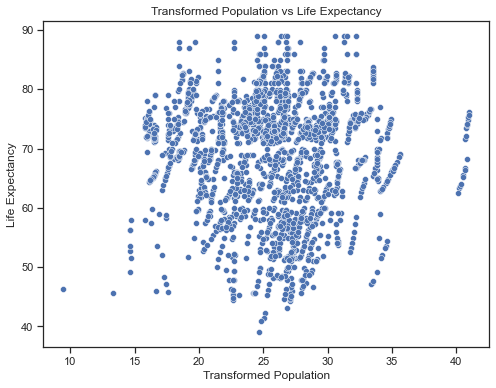

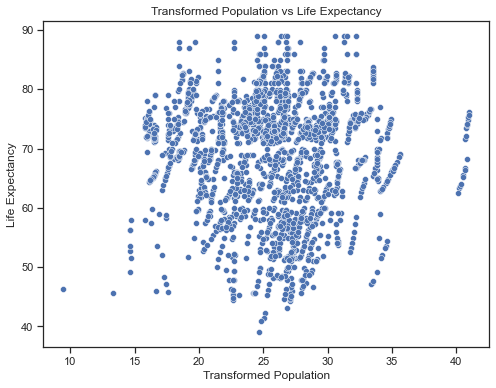

In [1654]:
# Original feature (e.g., Population)
original_feature = X_train['Population']

# Perform Box-Cox transformation and find the best lambda parameter
transformed_feature, lambda_bestfit = boxcox(original_feature)

# Create a scatterplot for the transformed feature vs. y_train
plt.figure(figsize=(8, 6))
sns.scatterplot(x=transformed_feature, y=y_train)
plt.title('Transformed Population vs Life Expectancy')
plt.xlabel('Transformed Population')
plt.ylabel('Life Expectancy')

# Display the best-fit lambda parameter
print(f'Best-fit lambda: {lambda_bestfit}')

# Check if the transformation improves linearity 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_train, x=transformed_feature, y=y_train)
plt.title('Transformed Population vs Life Expectancy')
plt.xlabel('Transformed Population')
plt.ylabel('Life Expectancy')

# Show the plots
plt.show()


This slightly updated level of linearity indicates that we can move forward with this transformed population feature. Now, we need to apply it to the validation and test sets:

In [1655]:
# Apply to val and test sets using lambda from training set
transformed_feature_val = boxcox(X_val['Population'], lmbda=lambda_bestfit)
transformed_feature_test = boxcox(X_test['Population'], lmbda=lambda_bestfit)


# Add boxcox population columns
X_train['Population_boxcox'] = transformed_feature
X_val['Population_boxcox'] = transformed_feature_val
X_test['Population_boxcox'] = transformed_feature_test

# Drop original population column
[X_train, X_val, X_test] = dropper([X_train, X_val, X_test], ['Population'])

In [1656]:
# Apply the specified transformation to the feature in each dataset
def bulge_transform(train_set, val_set, test_set, feature_names, transformation):

    # Add the transformed features as columns in each set
    for feature_name in feature_names:
        train_set[f'{feature_name}_{transformation.__name__}'] = transformation(train_set[feature_name])
        val_set[f'{feature_name}_{transformation.__name__}'] = transformation(val_set[feature_name])
        test_set[f'{feature_name}_{transformation.__name__}'] = transformation(test_set[feature_name])

HIV/AIDS, adult mortality, thinness, alcohol, and GDP are columns that have relationships with the target variable that resemble shapes on the left two quadrants on the Tukey-bulge diagram. Thus, we can make log transformations to linearize these relationship. 

In [1657]:
# Apply logarithmic transformation to features
bulge_transform(X_train, X_val, X_test, ["HIV/AIDS", "Adult Mortality", "thinness  1-19 years", "Alcohol", "GDP", "under-five deaths"], np.log)

Hepatitis B and Polio have relationships with life expectancy that resemble the bulges on the right quadrants of the Tuley-bulge diagram, so we will make the polynomial transformation feature^2 (for now, we might iterate with x^3 later) to linearize the relationships

In [1658]:
# Apply x^2 transformation to features
bulge_transform(X_train, X_val, X_test, ["Hepatitis B", "Polio"], np.square)

Now we can examine the updated relationships and how they changed:

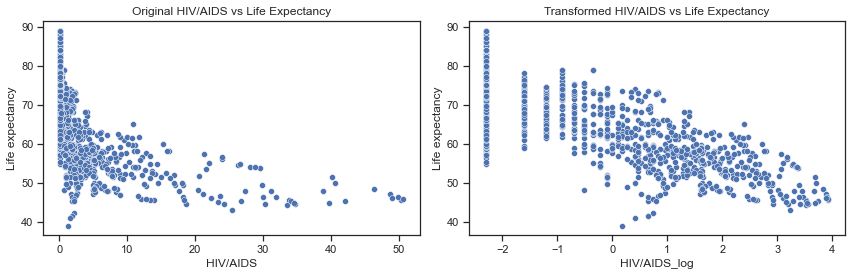

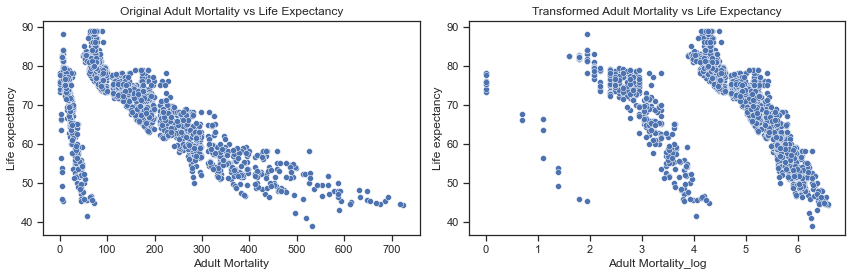

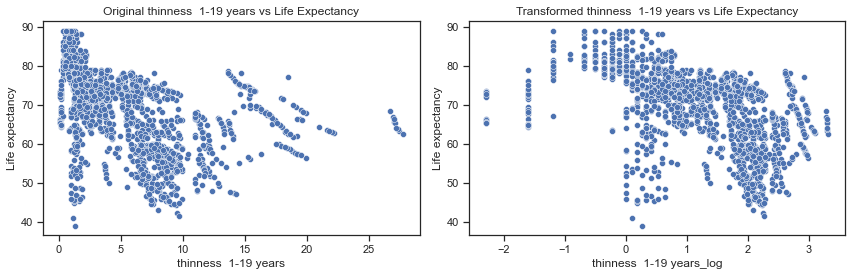

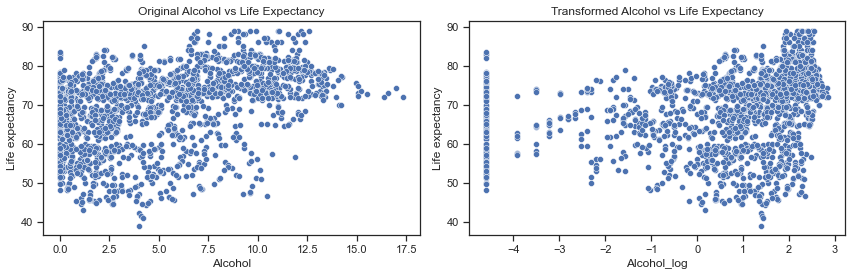

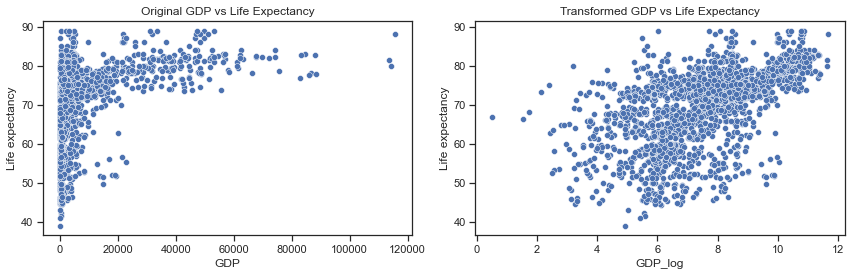

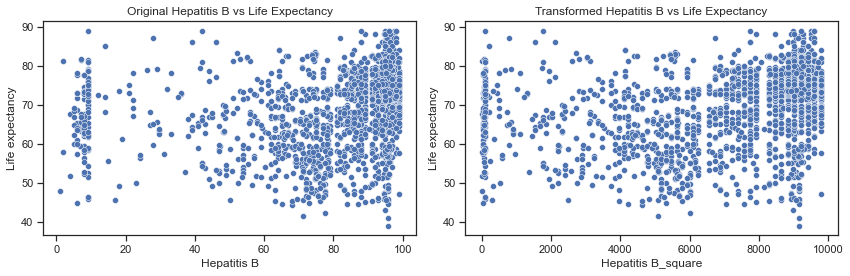

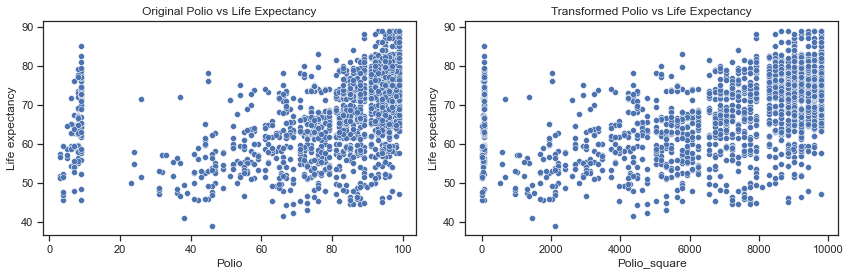

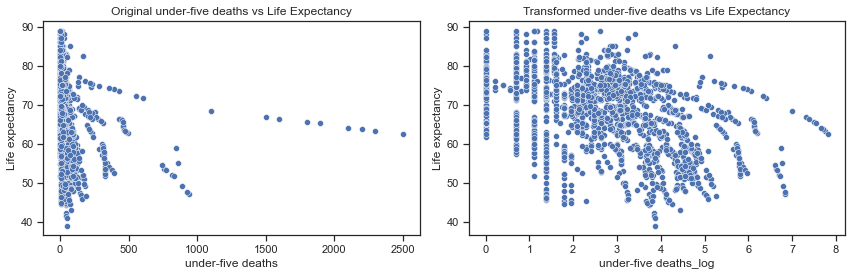

In [1659]:
# Visual inspection of non-linear relationships
columns = ["HIV/AIDS", "Adult Mortality", "thinness  1-19 years", "Alcohol", "GDP", "Hepatitis B", "Polio", "under-five deaths"]
transformed = ["HIV/AIDS_log", "Adult Mortality_log", "thinness  1-19 years_log", "Alcohol_log", "GDP_log", "Hepatitis B_square", "Polio_square", "under-five deaths_log"]
transformations = [np.log, np.log, np.sqrt, np.log, np.log, np.log, np.log] 

for col, new_col in zip(columns, transformed):
    
    plt.figure(figsize=(12, 4))  
    plt.subplot(1, 2, 1)  
    sns.scatterplot(x=X_train[col], y=y_train)
    plt.title(f'Original {col} vs Life Expectancy')

    plt.subplot(1, 2, 2)  # Create a subplot for the transformed column
    sns.scatterplot(x=X_train[new_col], y=y_train)
    plt.title(f'Transformed {col} vs Life Expectancy')
    
    plt.tight_layout()
    plt.show()


It seems like the transformations were generally successful, as the transformed HIV/AIDS, GDP, Alcohol, and thinness features have more linear relationships with the target variable than pre-transformation.

However, the transformations had adverse effects for some features including Hepatitis B, and to a lesser extent polio and under-five deaths. We can drop these transformed columns for now, depending on their correlations with the target variable, using 0.4 as the cutoff.

In [1660]:
# Drop pre transformation features 
[X_train, X_val, X_test] = dropper([X_train, X_val, X_test], ['HIV/AIDS', 'Alcohol', 'GDP', 'thinness  1-19 years'])

# Define the original and transformed column names
original_columns = ["Hepatitis B", "Polio", "under-five deaths"]
transformed_columns = ["Hepatitis B_square", "Polio_square", "under-five deaths_log"]

# Calculate correlations for the original columns
correlations_original = X_train[original_columns].corrwith(y_train)

# Calculate correlations for the transformed columns
correlations_transformed = X_train[transformed_columns].corrwith(y_train)

# Print the correlations
for col, corr_original, corr_transformed in zip(original_columns, correlations_original, correlations_transformed):
    print(f"Correlation with {col} (Original): {corr_original:.2f}")
    print(f"Correlation with {col} (Transformed): {corr_transformed:.2f}")

Correlation with Hepatitis B (Original): 0.24
Correlation with Hepatitis B (Transformed): 0.30
Correlation with Polio (Original): 0.44
Correlation with Polio (Transformed): 0.52
Correlation with under-five deaths (Original): -0.22
Correlation with under-five deaths (Transformed): -0.49


All transformed features have higher correlations with the dependent variable life expectancy. We will the also drop the original Hepatitis B from our model while including 'Polio_square' (we can iterate and test things out after we evaluate the initial model). Meanwhile, under-five deaths actually greatly benefited from this transformation in the context of linearizing its relationship with the target variable, so we will keep the transformed version.



In [1661]:
[X_train, X_val, X_test] = dropper([X_train, X_val, X_test], ['Hepatitis B_square', 'Polio', 'under-five deaths'])

The last thing to examine before modeling is the relationship between the transformed adult mortality and life expectancy, which happens to have 3 seperated piecewise downwards-sloping linear curves with similar slopes:

<AxesSubplot:xlabel='Adult Mortality_log', ylabel='Life expectancy'>

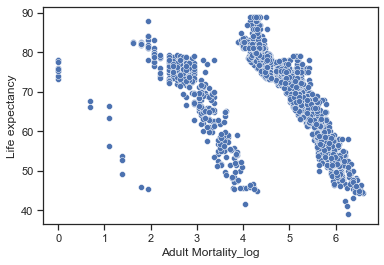

In [1662]:
sns.scatterplot(data=X_train, x = 'Adult Mortality_log', y=y_train)

After evaluating a more basic model, we can try to further linearize this as it is very unique with piecewise linear negative functions that have similar slopes in different clusters. For now, we will stick to the original, untransformed 'Adult Mortality' column.

In [1663]:
[X_train, X_val, X_test] = dropper([X_train, X_val, X_test], ['Adult Mortality_log'])

### Modeling

Lets display all of the predictor features we have narrowed down to: 

In [1664]:
# Predictor variables
X_train.columns

Index(['Year', 'Adult Mortality', 'Hepatitis B', 'BMI', 'Diphtheria',
       'Income composition of resources', 'Schooling', 'Status_Developing',
       'Population_boxcox', 'HIV/AIDS_log', 'thinness  1-19 years_log',
       'Alcohol_log', 'GDP_log', 'under-five deaths_log', 'Polio_square'],
      dtype='object')

Now, we can move onto dropping rows with NaN for the target variable for the purposes of our modeling.

In [1665]:
# Drop rows where the target variable is NaN
train_mask = y_train.notna()
X_train = X_train[train_mask]
y_train = y_train[train_mask]

val_mask = y_val.notna()
X_val = X_val[val_mask]
y_val = y_val[val_mask]

test_mask = y_test.notna()
X_test = X_test[test_mask]
y_test = y_test[test_mask]

Lastly, we can initialize, train, and validate the model using multiple linear regression and k-fold cross validation to get the average cross-validation score and the test score.

In [1666]:
# Initialize the linear regression model
model = LinearRegression()

# Define the number of folds for cross-validation
k = 4 

# Perform k-fold cross-validation on the validation set
cross_val_scores = cross_val_score(model, X_val, y_val, cv=k)

# Calculate the average of the cross-validation scores
avg_cross_val_score = np.mean(cross_val_scores)

# Train the model on the full training set
model.fit(X_train, y_train)

# Test the model on the test set and calculate the test score
test_score = model.score(X_test, y_test)

# Predict on the validation and test sets
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calculate the mean squared error for the validation and test sets
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate the root mean squared error (RMSE) for the validation and test sets
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)

# Output RMSE for validation and test sets
print(f'Validation RMSE: {rmse_val}')
print(f'Test RMSE: {rmse_test}')

# Output the cross-validation and test scores
print(f'Average Cross-Validation Score: {avg_cross_val_score}')
print(f'Test Score: {test_score}')

Validation RMSE: 3.1028019542839202
Test RMSE: 3.2705976360539855
Average Cross-Validation Score: 0.8971963511085025
Test Score: 0.881118876044687


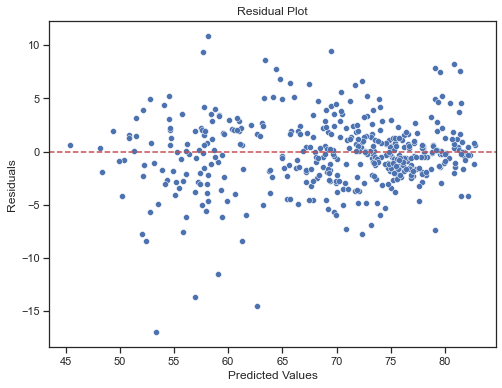

In [1667]:
# Calculate residuals
residuals = y_test - y_test_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--') 
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In conclusion, the model demonstrates commendable predictive accuracy, as evidenced by a high average cross-validation score of about 0.90 and a test score of approximately 0.88. These scores indicate that the model performs consistently and effectively across different data subsets. However, the RMSE values for both validation (3.13) and test (3.29) data suggest that there is a moderate level of error in the model's predictions. Overall, while the model shows strong potential, there may be opportunities (briefly mentioned earlier) to further refine it to reduce these prediction errors in future iterations.